# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality
    sns.histplot(sample, kde=True)
    plt.title("Sample Distribution (Check for Normality)")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()
    # Population mean 
    print("Population mean:", popmean)

    # Sample mean
    sample_mean = np.mean(sample)
    print("Sample mean:", round(sample_mean, 3))

    # Sample standard deviation
    sample_std = np.std(sample, ddof=1) 
    print("Sample standard deviation:", round(sample_std, 3))

    # Degrees of freedom
    df = len(sample) - 1
    print("Degrees of freedom:", df)

    # Critical t-value
    critical_t = stats.t.ppf(1 - alpha/2, df)
    print("Critical t-value:", round(critical_t, 3))

    # Perform one-sample t-test 
    t_stat, p_value = stats.ttest_1samp(sample, popmean)

    print("t-statistic:", round(t_stat, 3))
    print("p-value:", round(p_value, 4))

    # Decision
    if p_value < alpha:
        print("Result: Reject the null hypothesis (significant difference).")
    else:
        print("Result: Fail to reject the null hypothesis (no significant difference).")
    
    return t_stat, critical_t, p_value

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

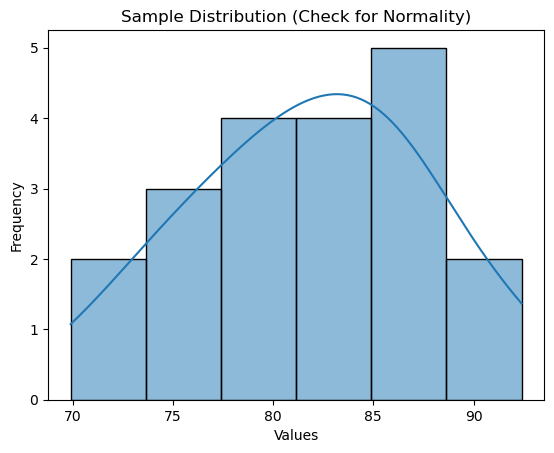

Population mean: 65
Sample mean: 81.8
Sample standard deviation: 5.922
Degrees of freedom: 19
Critical t-value: 2.093
t-statistic: 12.688
p-value: 0.0
Result: Reject the null hypothesis (significant difference).

--- Question 1: Original Data ---
t-statistic: 12.688
p-value: 0.0


In [8]:
#Question 1

# Original dataset
scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
          78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

# Population mean
popmean = 65

# Run one-sample t-test (using Exercise 1 function)
t_stat, critical_t, p_value = one_sample_ttest(scores, popmean, alpha=0.05)

print("\n--- Question 1: Original Data ---")
print("t-statistic:", round(t_stat, 3))
print("p-value:", round(p_value, 4))

## Interpretation of the above results 
### Hypotheses:

Null hypothesis (H0): μ = 65 (the online training did not improve performance; the mean score is equal to the class mean before training).

Alternative hypothesis (H1): μ > 65 (the online training improved performance; the mean score is greater than the class mean before training).

### Test results:

Population mean (μ): 65

Sample mean (x̄): 81.8

Sample standard deviation (s): 5.922

Degrees of freedom (df): 19

Critical t-value : 2.093

Calculated t-statistic: 12.688

p-value: 0.000

### Decision:
Since the t-statistic (12.688) > critical value (2.093) and the p-value (0.000) < 0.05, we reject the null hypothesis and conclude that there is strong statistical evidence that the students’ average score (81.8) after online training is significantly higher than the class mean before training (65). This supports the teacher’s belief that the online training improved student performance.

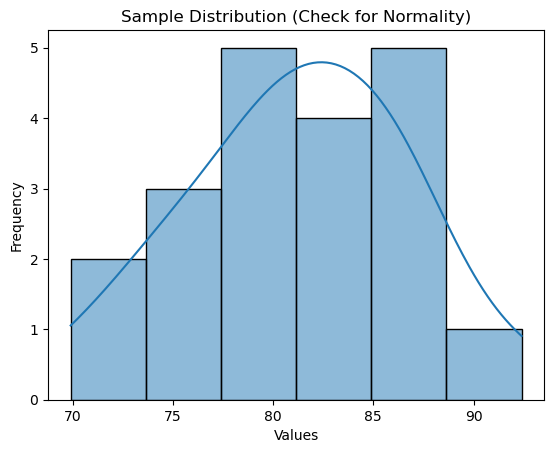

Population mean: 65
Sample mean: 81.3
Sample standard deviation: 5.522
Degrees of freedom: 19
Critical t-value: 2.093
t-statistic: 13.202
p-value: 0.0
Result: Reject the null hypothesis (significant difference).

--- Question 2: Corrected Data ---
t-statistic: 13.202
p-value: 0.0


In [9]:
#Question 2

# Corrected dataset (replace 90.9 with 80.9)
corrected_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
                    78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

# Population mean
popmean = 65

# Run one-sample t-test (using your fixed function)
t_stat_corr, critical_t_corr, p_value_corr = one_sample_ttest(corrected_scores, popmean, alpha=0.05)

print("\n--- Question 2: Corrected Data ---")
print("t-statistic:", round(t_stat_corr, 3))
print("p-value:", round(p_value_corr, 4))


## Question 2 Interpretation
### Hypotheses

Null hypothesis (H0): The mean score of the students is equal to the population mean (μ = 65).

Alternative hypothesis (H1): The mean score of the students is greater than the population mean (μ > 65).

### Test Results

Population mean: 65

Sample mean: 81.3

Sample standard deviation: 5.522

Degrees of freedom: 19

Critical t-value : 2.093

Computed t-statistic: 13.202

p-value: 0.0

### Interpretation

Since the computed t-statistic (13.202) is much larger than the critical t-value (2.093), and the p-value (0.0) is less than 0.05, we reject the null hypothesis  hence  the  corrected sample mean of 81.3 is significantly higher than the population mean of 65 at the 5% significance level.

## Bonus

### Effect Size of the First Sample Compared to the Population

To calculate the effect size, we use Cohen’s d for a one-sample t-test:

d = (sample mean- population mean)/sample standard deviation

#### Given values:
Sample mean = 81.3 
Population mean = 65  
Sample standard deviation  = 5.522


d = {81.3 - 65}/{5.522} =2.95

#### Interpretation:
By Cohen’s rule of thumb:  
Small = 0.2  
Medium = 0.5  
Large = 0.8  

Here, d ≈ 2.95, which is an extremely large effect size.  
This means the sample mean is almost 3 standard deviations above the population mean.  


## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 